<a href="https://colab.research.google.com/github/jcheung3-eng/704-project-BUDT/blob/main/704project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What are the Effect of Caffeine to Human?
<p><img src="https://images.unsplash.com/photo-1511920170033-f8396924c348" alt="Coffee cup and health data concept"></p>

Caffeine is the most widely consumed psychoactive stimulant in the world and is commonly used to improve alertness, focus, and mood. Its widespread availability in coffee, tea, energy drinks, and dietary supplements makes it a routine part of daily life for many individuals, which motivated our interest in understanding what drives caffeine consumption and how it relates to health. This study investigates the key predictors of caffeine intake and examines its associations with health and lifestyle outcomes in a broad population.

The GlobalCoffeeHealth dataset offers a chance to explore these patterns at scale. It contains 10,000 synthetic but realistic records representing coffee consumption, sleep behavior, and health metrics across 20 countries, modeling the interconnections found in real-world research. Each entry includes demographics, daily coffee intake, estimated caffeine levels, sleep duration and quality, BMI, resting heart rate, stress levels, physical activity, occupation, smoking and alcohol use, and self-reported health issues.

In this notebook, we will use tools like pandas, matplotlib, and statistical modeling to examine how caffeine consumption differs across countries, how it impacts sleep, and how lifestyle factors like alcohol, smoking, or stress interact with daily energy habits.

## 1. Data Preparation

Before doing all the analysis, ensure that data are prepared and suitable.

In [ ]:
# import libraries
import pandas as pd
# load the data
coffee = pd.read_csv("https://raw.githubusercontent.com/jcheung3-eng/704-project-BUDT/refs/heads/main/synthetic_coffee_health_10000.csv")
coffee.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [ ]:
# remove gender is other
coffee = coffee[coffee["Gender"] != "Other"]
coffee.shape

(9774, 16)

In [ ]:
# transform gender into dummy variable
coffee["Gender"] = coffee["Gender"].map({"Female": 1, "Male": 0})
coffee.head(10)

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,0,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,0,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,0,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,0,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,1,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
5,6,32,0,Mexico,3.4,326.4,6.4,Good,27.0,82,Low,8.8,NaN,Service,0,0
6,7,53,0,France,2.7,252.1,7.8,Good,24.3,58,Low,1.0,Mild,Student,1,0
7,8,44,1,Canada,4.5,423.5,5.5,Fair,15.8,62,Medium,0.7,Mild,Service,1,1
8,9,29,0,UK,1.7,162.0,7.1,Good,21.7,60,Low,2.2,NaN,Service,1,1
9,10,41,1,Switzerland,4.0,383.2,6.4,Good,30.4,69,Low,11.9,Mild,Office,0,0


## 2. Numeric Variables descriptive analysis

In [ ]:
# Define numeric variables
cont_vars = [
    "Age",
    "Coffee_Intake",
    "Caffeine_mg",
    "Sleep_Hours",
    "BMI",
    "Heart_Rate",
    "Physical_Activity_Hours"
]

# import libraries
import scipy.stats as stats

results = []

# measire skewness and shape
for col in cont_vars:
    data = coffee[col].dropna()
    skew_val = stats.skew(data)
    kurt_val = stats.kurtosis(data)

    # classify based on skewness
    if abs(skew_val) < 0.5:
        shape = "Approximately Normal"
    elif skew_val >= 0.5:
        shape = "Right-skewed"
    else:  # skew_val <= -0.5
        shape = "Left-skewed"

    results.append({
        "Variable": col,
        "Skewness": round(skew_val, 3),
        "Kurtosis": round(kurt_val, 3),
        "Shape": shape
    })

# print result
skew_summary = pd.DataFrame(results)
skew_summary

,Variable,Skewness,Kurtosis,Shape
0,Age,0.364,-0.343,Approximately Normal
1,Coffee_Intake,0.260,-0.277,Approximately Normal
2,Caffeine_mg,0.260,-0.276,Approximately Normal
3,Sleep_Hours,-0.019,-0.140,Approximately Normal
4,BMI,0.049,-0.161,Approximately Normal
5,Heart_Rate,0.098,-0.265,Approximately Normal
6,Physical_Activity_Hours,0.001,-1.199,Approximately Normal


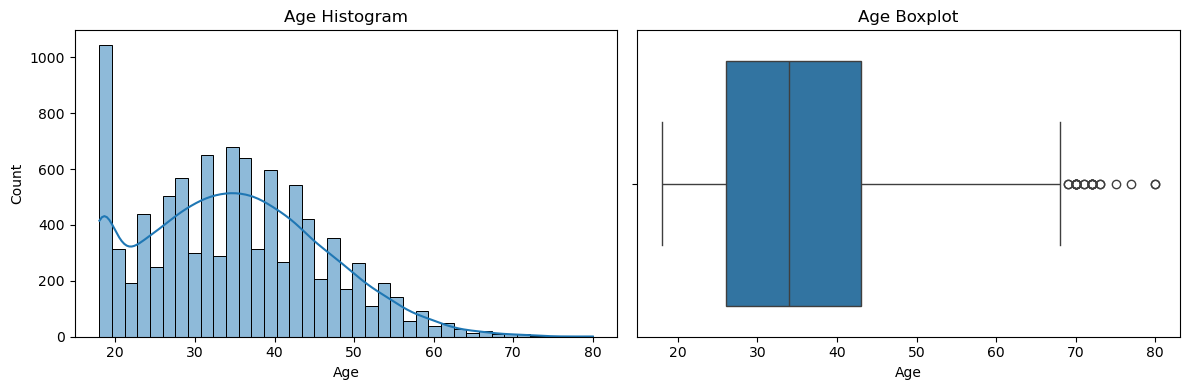

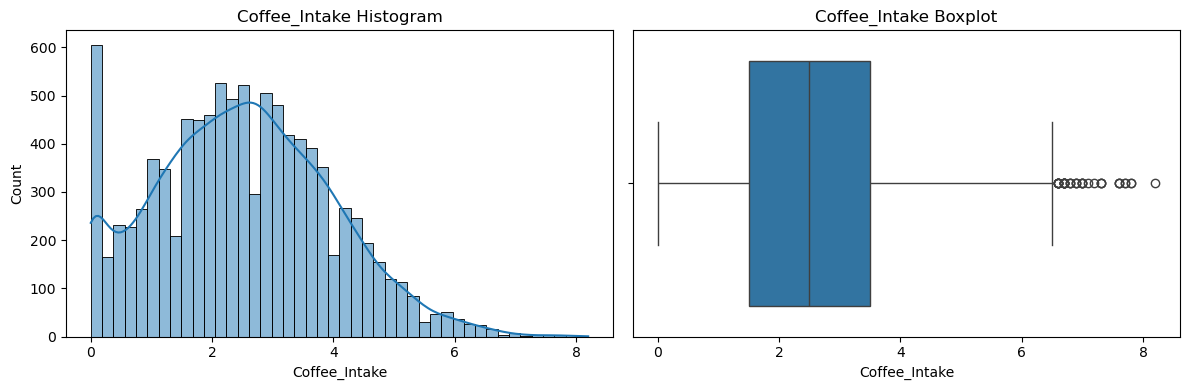

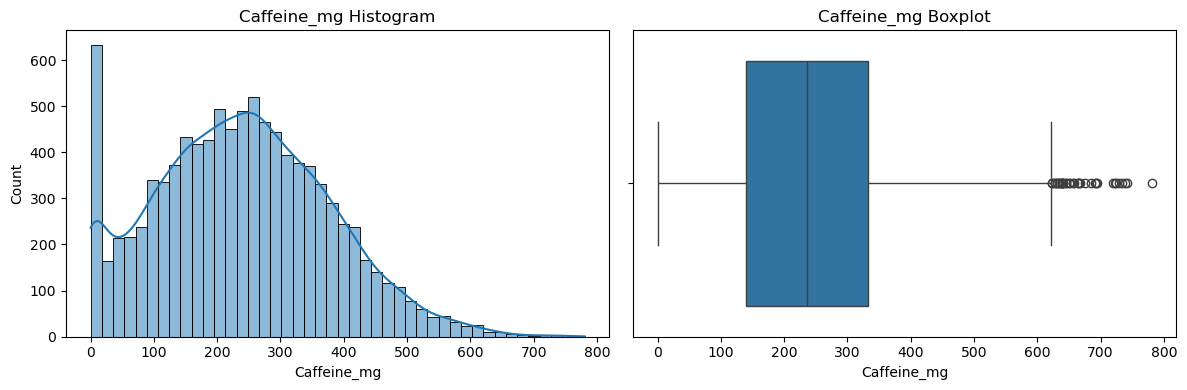

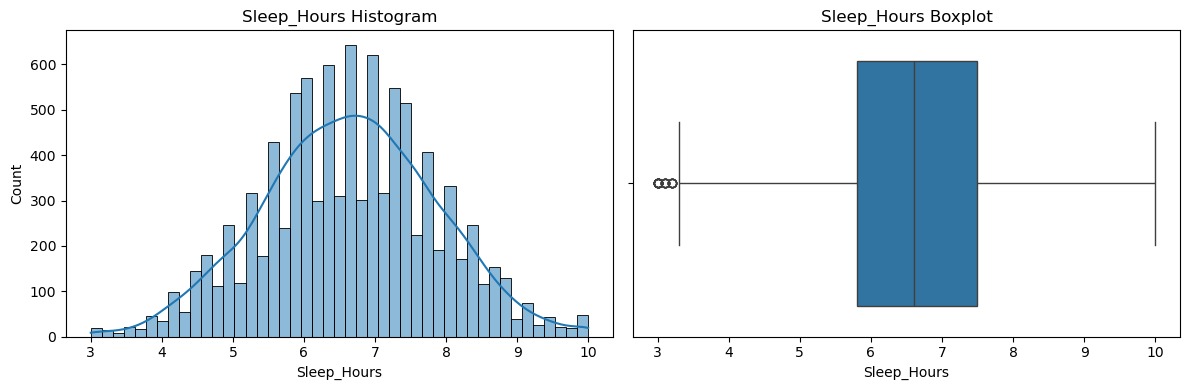

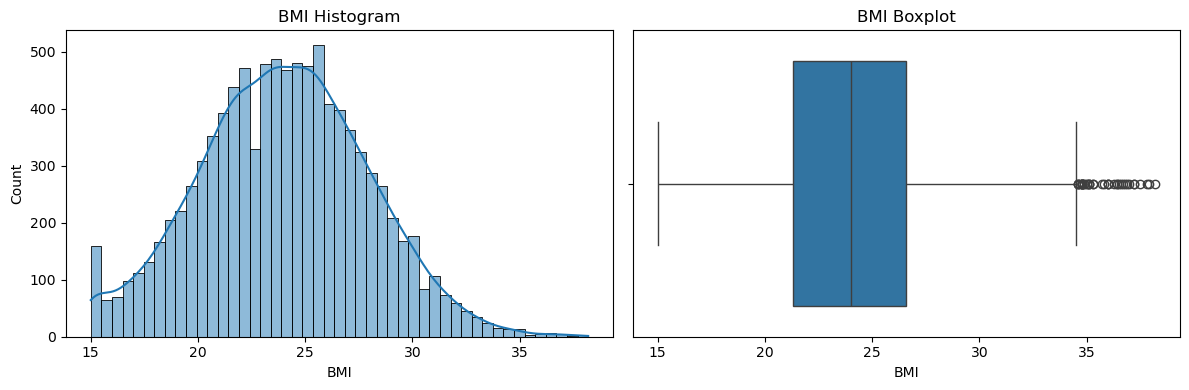

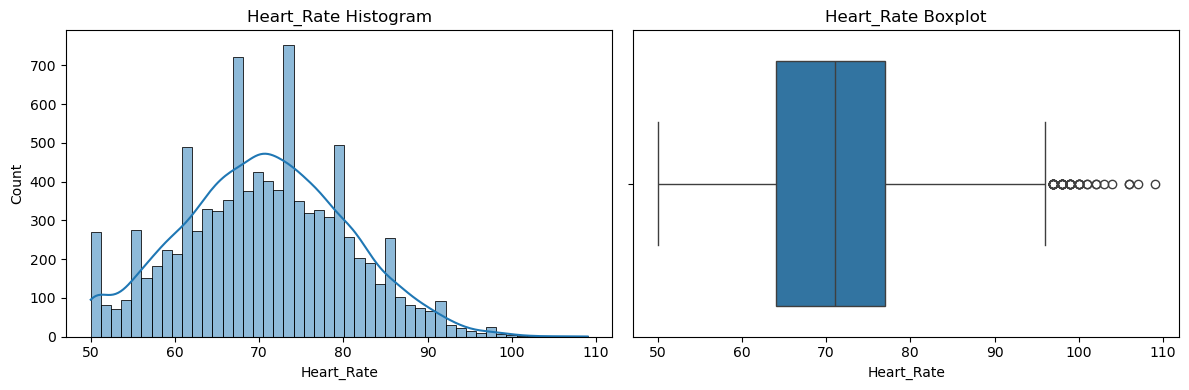

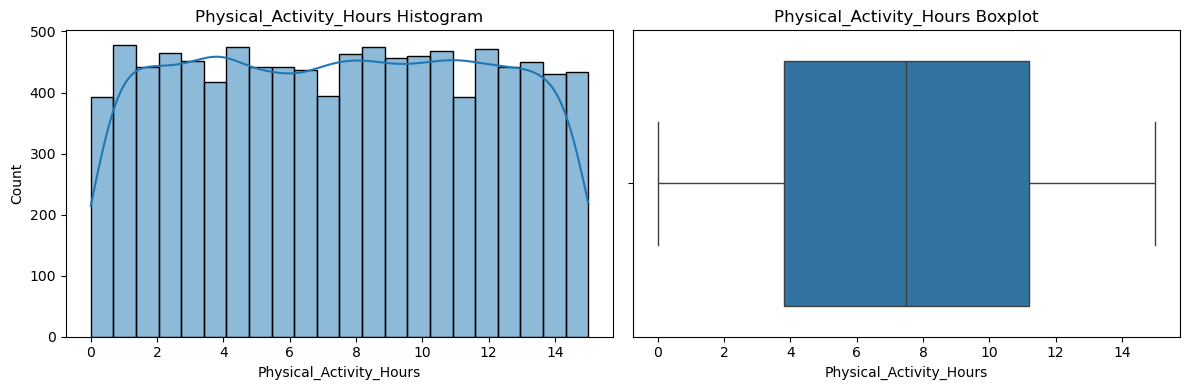

In [ ]:
## draw histogram and boxplot
import seaborn as sns
import matplotlib.pyplot as plt

for col in cont_vars:
    plt.figure(figsize=(12,4))

    # histogram
    plt.subplot(1,2,1)
    sns.histplot(coffee[col], kde=True)
    plt.title(f"{col} Histogram")

    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=coffee[col])
    plt.title(f"{col} Boxplot")

    plt.tight_layout()
    plt.show()

#### Age

The distribution of age is right-skewed, with most individuals falling between 25 and 45 years old. The histogram shows a clear peak around ages 30 to 40, indicating that the dataset is dominated by working-age adults. The boxplot reveals several high-end outliers above age 65, suggesting there are older respondents, but they represent a smaller portion of the population.  

---

#### Coffee Intake

Coffee intake also shows a right-skewed distribution. Most respondents consume between 1 and 4 cups per day, with a gradual drop in frequency for higher amounts. The boxplot shows several high-end outliers above 6 cups, indicating a small group of heavy coffee drinkers.  

---

#### Caffeine (mg)

Caffeine intake (mg) mirrors the shape of coffee intake but with a wider spread because caffeine can come from other sources such as tea, soda, energy drinks, and supplements. Most respondents fall between 100 and 350 mg daily, but many upper outliers appear in the 500–800 mg range.  

---

#### Sleep Hours

Sleep hours follow an approximately normal distribution centered around 6 to 7.5 hours of sleep. The majority of individuals fall within this recommended range, though a few low-end outliers appear at 3–4 hours.  

---
#### BMI

The distribution of BMI appears approximately normal with a slight right skew. Most individuals fall between a BMI of 20 and 30, with the histogram showing a strong concentration around 23–27. The boxplot confirms that the majority of values cluster in the healthy-to-overweight range. A number of upper outliers above 32–35 suggest the presence of individuals with higher BMI values.

---

#### Heart Rate

Heart rate shows a near-normal distribution centered around 65–75 beats per minute (bpm). The histogram reveals a clear peak in this typical resting heart rate range, while the distribution stretches into higher values approaching 100 bpm. The boxplot also highlights several outliers above 100 bpm.

---

#### Physical Activity Hours

Physical activity hours display a nearly uniform distribution across the entire range of 0 to 15 hours per week. Unlike the other variables, this distribution is fairly flat, indicating that participants represent a wide range of activity levels with no strong concentration in any particular category. The boxplot supports this, showing an evenly spread distribution without extreme outliers.



## 3. Heat Map

To ensure there is no multicollinearity concern between coffee intake and caffeine, and numerical variables we generated a correlation heatmap.

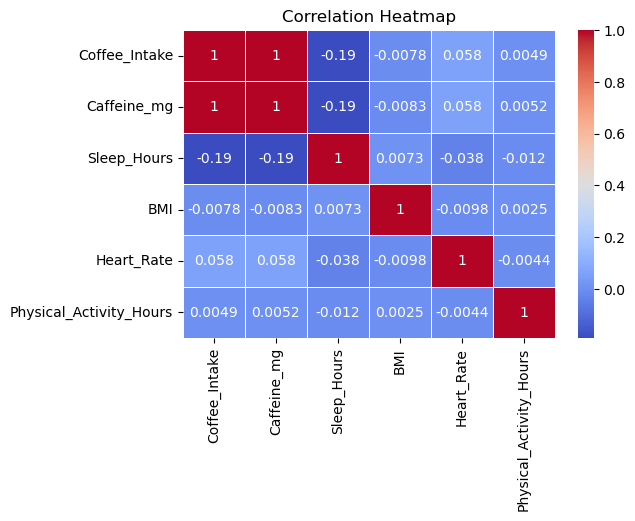

In [ ]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# generate heat map
corr = coffee.iloc[:, [4,5,6,8,9,11]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#### Correlation Heatmap
This visualization allows us to quickly identify whether any linear relationships exist between Coffee_Intake and numerical variables.

Overall, the correlations are very weak, indicating that coffee consumption does not show strong linear associations with most health or lifestyle variables.

Sleep_Hours has a small negative correlation (≈ −0.19), suggesting that higher coffee intake is slightly associated with fewer sleep hours, but the relationship is not strong enough to be considered predictive.

Variables such as BMI, Heart_Rate, and Physical_Activity_Hours display correlations very close to zero, indicating virtually no linear relationship with coffee intake in this dataset.


## 4. Categorical Varibles Descriptive Analysis

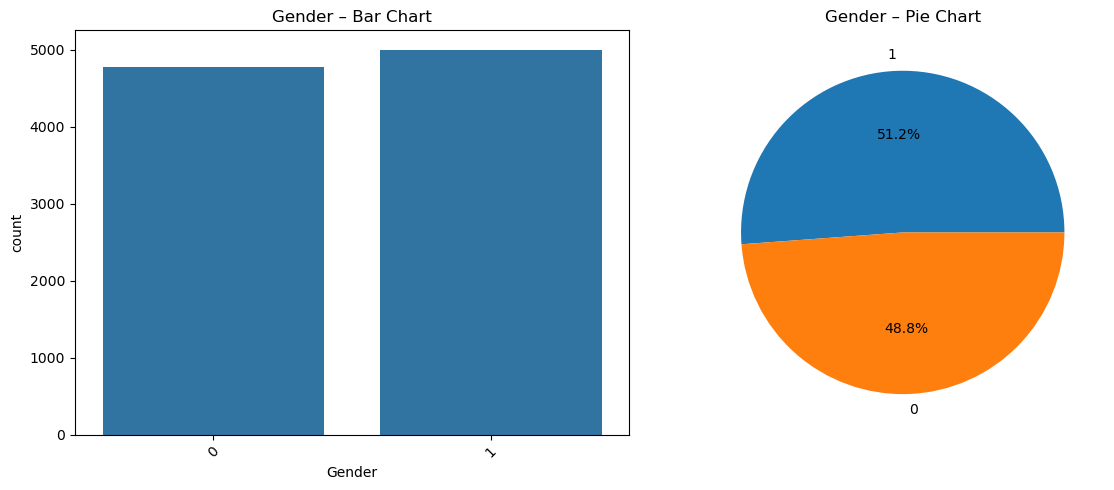

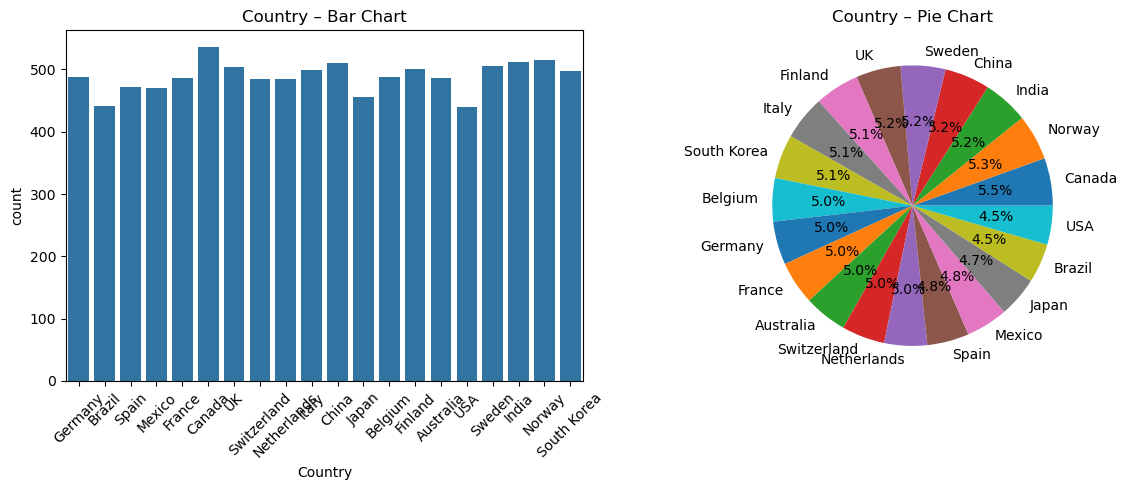

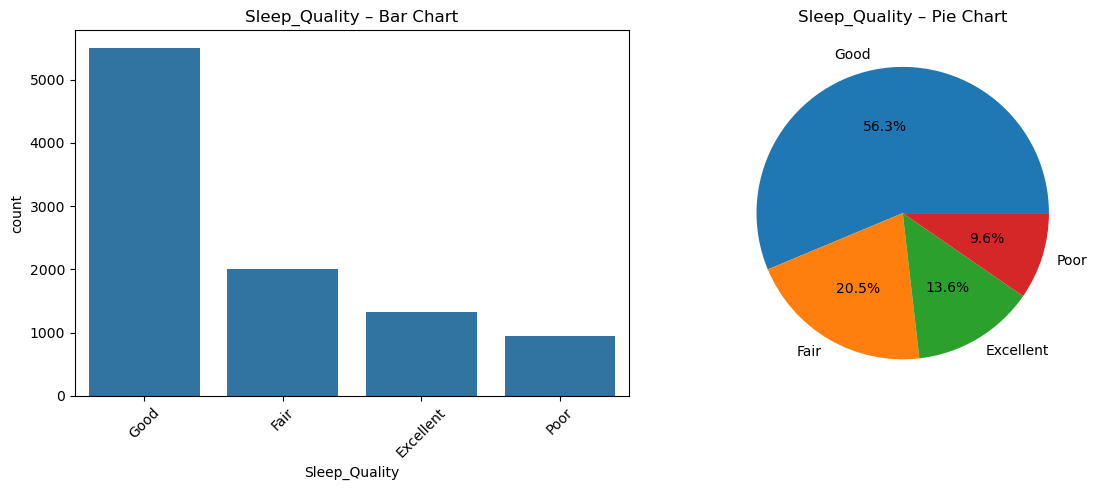

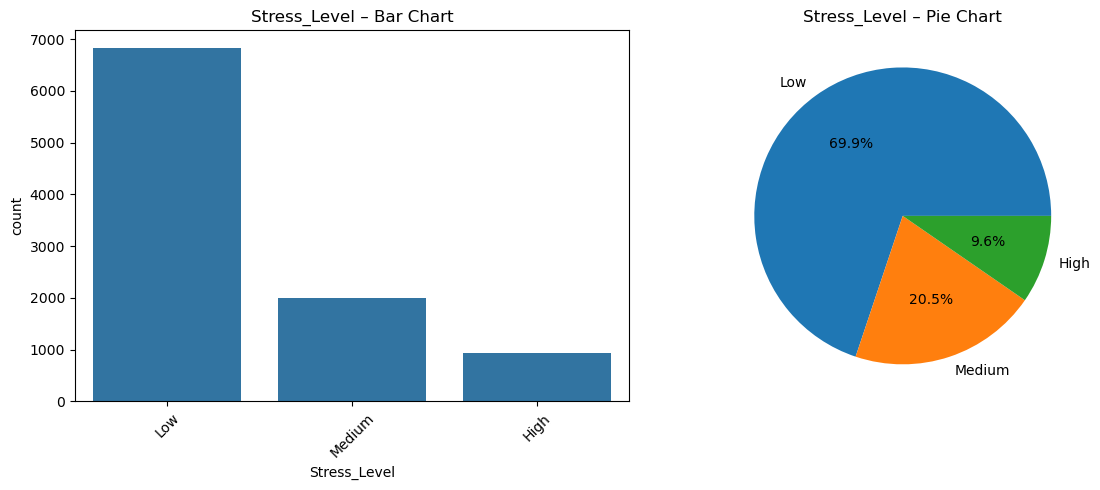

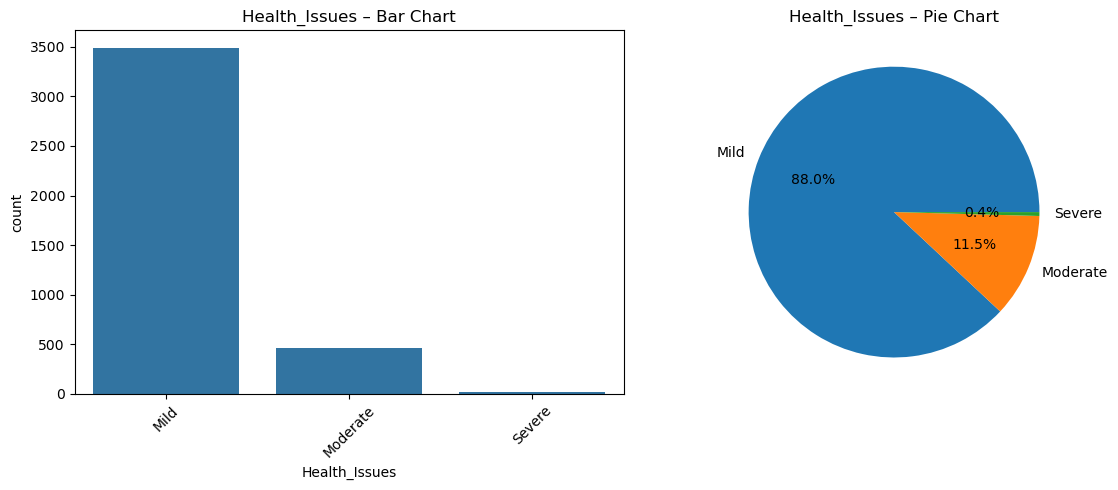

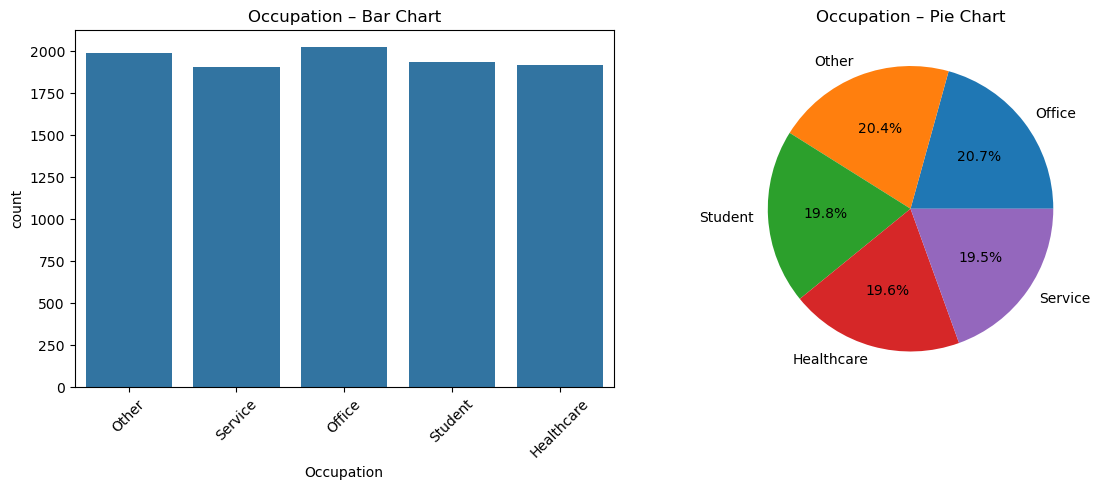

In [ ]:
# Define categorical variables
cat_vars = [
    "Gender", "Country", "Sleep_Quality",
    "Stress_Level", "Health_Issues", "Occupation"
]

for col in cat_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # --- Left: Bar Chart ---
    sns.countplot(ax=axes[0], x=col, data=coffee)
    axes[0].set_title(f"{col} – Bar Chart")
    axes[0].tick_params(axis='x', rotation=45)

    # --- Right: Pie Chart ---
    coffee[col].value_counts().plot(
        kind="pie",
        autopct="%1.1f%%",
        ax=axes[1],
        ylabel=""
    )
    axes[1].set_title(f"{col} – Pie Chart")

    plt.tight_layout()
    plt.show()

#### Gender

The bar chart shows a nearly balanced gender distribution, with both categories represented in similar proportions. This balance is useful for analysis because it reduces the risk of gender-based bias in behavioral or health-related patterns. The corresponding pie chart confirms this even split, indicating that gender is unlikely to affect the effect of other variables.

---

#### Country

The country distribution is relatively uniform, with each country contributing roughly similar counts. This indicates that the dataset is not dominated by any single nation and captures a broad, diverse set of cultural backgrounds. The pie chart reinforces this diversity, suggesting that findings related to lifestyle factors are generalizable across multiple regions rather than being tied to one location.

---

#### Sleep Quality

Sleep quality is heavily skewed toward the "Good" category, followed by smaller groups reporting "Fair" and "Excellent" sleep. The smallest category is "Poor," indicating that only a small subset of individuals experience significant sleep difficulties. The pie chart highlights that more than half of participants consider their sleep quality to be good.

---

#### Stress Level

The bar chart shows a strong majority in the "Low" stress category, with fewer individuals reporting "Medium" stress and an even smaller number reporting "High" stress. The pie chart similarly shows that low stress dominates the sample.

---

#### Health Issues

Health issues are predominantly classified as "Mild," with far fewer individuals falling into "Moderate" or "Severe" categories. The pie chart clearly shows that the vast majority of participants report little health concerns.

---

#### Occupation

All five occupational categories (Other, Service, Office, Student, Healthcare) appear in similar proportions based on the bar chart. This balanced representation across professions suggests that the dataset captures a wide range of daily routines and work environments.


## 5. Influence of Age to Coffee Intake


Mean caffeine consumption by age group: Age_group
18-25    243.006033
25-30    236.818600
30-40    237.303757
40-50    237.200287
50-60    238.132279
60-70    233.580000
70+      223.946667
Name: Caffeine_mg, dtype: float64


C:\Users\bella\AppData\Local\Temp\ipykernel_24352\1131793106.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_means = coffee.groupby("Age_group")["Caffeine_mg"].mean()


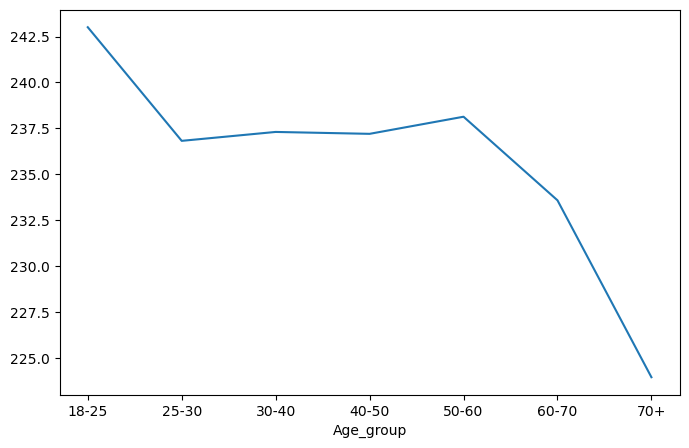

In [ ]:
# create age group
coffee["Age_group"] = pd.cut(coffee["Age"], bins = [18, 25, 30, 40, 50, 60, 70, 80], labels = ["18-25", "25-30", "30-40", "40-50", "50-60", "60-70", "70+"])

# means caffeine intake for each age group
age_group_means = coffee.groupby("Age_group")["Caffeine_mg"].mean()
print("\nMean caffeine consumption by age group:", age_group_means)

# plot trend
plt.figure(figsize=(8,5))
age_group_means.plot(kind="line")
plt.show()

#### Caffeine Consumption by Age Group

The results show a clear age-related pattern in caffeine consumption. Individuals in the 18–25 age group consume the highest average amount of caffeine (≈243 mg/day), which then declines slightly in the 25–30 and 30–40 age ranges. From ages 30–60, caffeine consumption remains relatively stable, staying between 237–238 mg on average. However, after age 60, caffeine intake begins to decrease more noticeably, dropping to 233 mg for ages 60–70 and reaching the lowest point 224 mg/dayfor individuals aged 70 and above.

---
##### Younger adults (18–25)
They tend to rely more heavily on caffeine, likely due to academic demands, social habits, and inconsistent sleep patterns. This age group commonly uses caffeine as a performance enhancer for studying, work, or late-night activities.

---
##### Middle-aged adults (30–60)
They show stable caffeine consumption, which aligns with routine work schedules where coffee becomes a habitual part of daily life rather than a stimulant for acute need.

---
##### Older adults (60+)
They consume less caffeine overall. This may reflect health concerns, medical advice to reduce stimulant intake, sensitivity to caffeine’s effects (such as disrupting sleep or raising heart rate), or lifestyle changes after retirement.

---
Overall, the trend indicates that caffeine consumption is highest in early adulthood, stable through midlife, and declines significantly in older age. This aligns with real-world patterns driven by lifestyle, health considerations, and daily energy demands.


## 6. Influence of Occupation to Coffee Intake


Mean caffeine consumption by occupation: Occupation
Healthcare    241.684687
Service       239.039181
Student       238.756382
Other         237.301255
Office        235.652595
Name: Caffeine_mg, dtype: float64
             count        mean         std  min      25%     50%      75%  \
Occupation                                                                  
Healthcare  1920.0  241.684687  141.063630  0.0  141.450  235.90  334.500   
Office      2023.0  235.652595  135.179664  0.0  137.100  234.00  328.250   
Other       1992.0  237.301255  139.022243  0.0  135.550  234.90  337.325   
Service     1904.0  239.039181  134.195535  0.0  142.525  238.65  328.025   
Student     1935.0  238.756382  138.509368  0.0  139.250  234.70  333.450   

              max  
Occupation         
Healthcare  723.9  
Office      733.1  
Other       738.8  
Service     693.4  
Student     780.3  


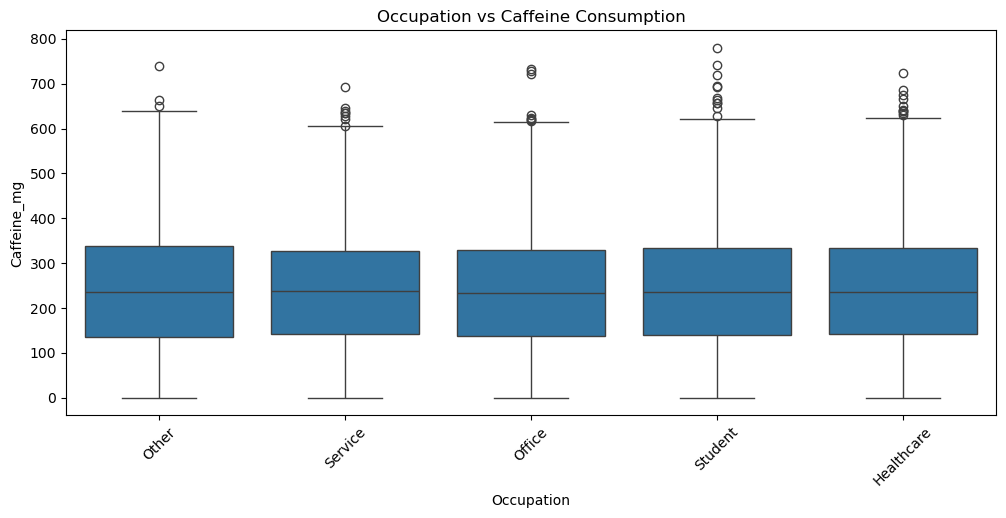

In [ ]:
# mean caffeine intake by occupation, sort from high to low
occ_means = coffee.groupby("Occupation")["Caffeine_mg"].mean().sort_values(ascending=False)
print("\nMean caffeine consumption by occupation:", occ_means)

# summary statistics
print(coffee.groupby("Occupation")["Caffeine_mg"].describe())

# boxplot
plt.figure(figsize=(12,5))
sns.boxplot(data=coffee, x="Occupation", y="Caffeine_mg")
plt.title("Occupation vs Caffeine Consumption")
plt.xticks(rotation=45)
plt.show()

#### Caffeine Consumption by Occupation

The boxplot and summary statistics show how caffeine intake varies across different occupation groups. Overall, the differences between occupations are relatively small.

Mean Caffeine Intake Is Very Similar Across Occupations
The average caffeine consumption for all groups falls within a narrow range:

- Healthcare: 241.68 mg  
- Service: 239.04 mg  
- Student: 238.76 mg  
- Other: 237.30 mg  
- Office: 235.65 mg

These results suggest that caffeine consumption is fairly consistent across occupational categories, with only about a 6 mg difference between the highest and lowest means. This indicates that occupation alone does not strongly determine daily caffeine habits.

---

##### Students and Healthcare Workers Show Slightly Higher Caffeine Intake
Although the differences are small, Students and Healthcare workers stand out. Both groups show slightly higher mean intake and a tendency toward higher maximum values. This could result from: long or irregular hours, high workload or academic stress, and greater reliance on caffeine for alertness.

---

##### All Occupations Show Wide Variability
The standard deviations (≈ 134–141 mg) and long whiskers in the boxplots indicate large individual differences within every occupation. This reinforces that personal habits, stress level, and lifestyle factors likely play a bigger role than occupation.


## 7. Influence of Caffeine to Heart Rate, Physical Activity Hours and BMI

In [ ]:
#OLS regressions
# caffeine and heart rate
import statsmodels.formula.api as smf
model_hr = smf.ols("Heart_Rate ~ Caffeine_mg", data=coffee).fit()
print(model_hr.summary())

# caffeine and physical activity
model_pa = smf.ols("Physical_Activity_Hours ~ Caffeine_mg", data=coffee).fit()
print(model_pa.summary())

# caffeine and BMI
model_bmi = smf.ols("BMI ~ Caffeine_mg", data=coffee).fit()
print(model_bmi.summary())

# reverse model: physical activity and caffeine intake
modelpa = smf.ols("Caffeine_mg ~ Physical_Activity_Hours", data=coffee).fit()
print(modelpa.summary())

                            OLS Regression Results                            
Dep. Variable:             Heart_Rate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     33.46
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           7.48e-09
Time:                        17:08:45   Log-Likelihood:                -36177.
No. Observations:                9774   AIC:                         7.236e+04
Df Residuals:                    9772   BIC:                         7.237e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      69.6351      0.198    351.049      

#### Regression Analysis Summary

To investigate how caffeine intake relates to key health and lifestyle indicators, we ran a series of Ordinary Least Squares (OLS) regressions examining three outcomes—Heart Rate, Physical Activity Hours, and BMI—as well as a reverse model testing whether physical activity predicts caffeine intake.

##### Caffeine Intake and Heart Rate
The regression model showed a statistically significant positive relationship between caffeine intake and heart rate. Although the effect size was small (approximately 0.004 bpm per mg of caffeine), the p-value was < 0.001, indicating strong statistical significance.

However, the model’s R² was only 0.003, meaning caffeine explains less than 1% of heart rate variation. This suggests that while caffeine elevate heart rate slightly—consistent with biological expectations, it is not a major driver of cardiovascular variability in this dataset.

---

##### Caffeine Intake and Physical Activity Hours
The regression between caffeine intake and physical activity produced another statistically significant but very small effect. The direction was slightly positive, meaning higher caffeine intake was associated with slightly more physical activity. Yet, the magnitude was negligible, and the model explained almost none of the variance.

This suggests there is no meaningful behavioral link between how much caffeine individuals consume and the number of hours they spend being physically active. Although caffeine is often perceived as an energy booster, people’s activity levels appear to be determined by broader lifestyle, occupational demands, or personal habits, rather than caffeine consumption.

---

##### Caffeine Intake and BMI
The regression evaluating whether caffeine predicts BMI also showed a statistically significant coefficient but an extremely small effect size, with R² again nearly zero. This indicates that caffeine intake does not meaningfully influence body weight or body mass index in the observed population.

Given that caffeine can affect metabolism temporarily, one might expect some small association. However, BMI is shaped by long-term dietary patterns, physical activity, genetics, and lifestyle factors. Caffeine consumption alone is not a reliable predictor of weight status.

---

##### Physical Activity Hours and Caffeine Intake (Reverse Regression)
To check whether more active individuals consume more caffeine, a second model regressed caffeine intake on physical activity hours. While the coefficient was statistically significant, it was again extremely small and explained almost no variance. This confirms that physical activity does not meaningfully predict caffeine consumption, and vice versa. The relationship between these variables is statistically detectable due to large sample size, but not practically meaningful.


## 8. Influence of Coffee Intake to Sleep Quality and Sleep Hours

In [ ]:
# summary statistics of sleep quality on coffee intake
coffee.groupby("Sleep_Quality")["Coffee_Intake"].describe()

,count,mean,std,min,25%,50%,75%,max
Sleep_Quality,,,,,,,,
Excellent,1326.0,2.056335,1.357006,0.0,1.0,2.0,2.975,6.7
Fair,2006.0,2.762612,1.458646,0.0,1.7,2.8,3.800,7.8
Good,5502.0,2.446001,1.420319,0.0,1.4,2.4,3.400,8.2
Poor,940.0,2.982128,1.485786,0.0,2.0,3.0,4.000,7.6


#### Coffee Intake by Sleep Quality

The descriptive statistics reveal a clear and meaningful relationship between sleep quality and coffee consumption. Individuals with poorer sleep tend to consume more coffee on average, while those with better sleep quality consume less.

##### Excellent Sleep Quality

Participants with excellent sleep quality have the lowest average coffee intake (mean = 2.06 cups/day). Their distribution is tightly clustered, indicated by the lowest standard deviation (1.36). The quartiles show that half of this group consumes between 1.0 and 2.0 cups, suggesting that individuals who sleep well rely less on caffeine throughout the day.

##### Good Sleep Quality

This group represents the largest portion of the dataset. Their average intake is slightly higher (mean = 2.45 cups/day) but still relatively moderate. Quartiles indicate that most individuals remain within typical daily consumption levels between 1.4 and 2.4 cups. These results suggest that even individuals who report “good” sleep use caffeine regularly, but not excessively.

##### Fair Sleep Quality

Coffee intake increases noticeably among those with fair sleep quality (mean = 2.76 cups/day). This group shows a wider spread of consumption, reflected in a higher standard deviation (1.46). Their upper quartile (3.8 cups) indicates more frequent moderate-to-high coffee use, possibly reflecting efforts to compensate for inconsistent or insufficient rest.

##### Poor Sleep Quality

Participants reporting poor sleep consume the highest amount of coffee on average (mean = 2.98 cups/day). Their quartiles between 2.0 and 4.0 cups show that many individuals in this group rely on coffee more heavily than those in better sleep categories. The combination of higher average consumption and broader variability suggests caffeine may be used as a coping mechanism for fatigue or sleep disruption.


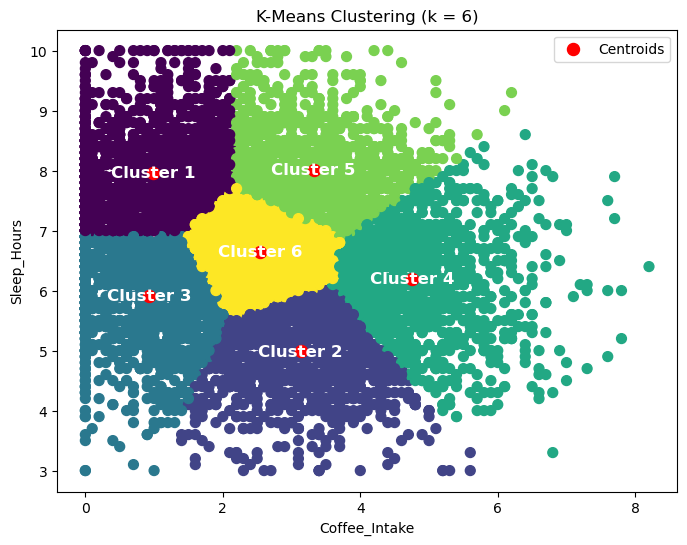

In [ ]:
# import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# define X
X = coffee.iloc[:, [4, 6]].values

kmeans = KMeans(n_clusters=6, n_init=100, random_state=42)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))

# scatter plot with cluster colors
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", s=50)

# centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            s=300, c='red', marker='.', label='Centroids')

# add cluster labels 1–6
for i, (x, y) in enumerate(centers):
    plt.text(x, y, f"Cluster {i+1}",
             fontsize=12, color="white", weight="bold",
             ha='center', va='center')

plt.xlabel("Coffee_Intake")
plt.ylabel("Sleep_Hours")
plt.title("K-Means Clustering (k = 6)")
plt.legend()
plt.show()

### Interpretation of K-Means Clustering (Coffee Intake vs Sleep Hours)

#### Variables Used
- Coffee_Intake (cups per day)  
- Sleep_Hours (hours of sleep per night)

The K-Means model (k = 6) groups individuals into *six distinct lifestyle patterns*, each representing different combinations of caffeine consumption and sleep behavior.

#### Cluster-by-Cluster Interpretation

##### Cluster 1 — “Moderate Coffee / Moderate Sleep”

- Coffee intake: 2-4 cups/day
- Sleep hours: ~5.5-7.5 hours

This cluster reflects a typical working adult:
- Drinks coffee regularly but moderately  
- Gets functional (though not optimal) sleep  

---

##### Cluster 2 — “Low Coffee / Healthy Sleepers”

- Low coffee intake (0–2 cups/day)
- Long, consistent sleep (7–10 hours)

Individuals in this cluster demonstrate naturally healthy sleep habits and therefore rely less on caffeine.

---

##### Cluster 3 —  “High Coffee / Sleep-Deprived Users”

- Very high coffee intake (4–6+ cups/day)
- Sleep hours range from undersleeping to oversleeping

These individuals appear trapped in a fatigue–caffeine cycle:

1. Not enough sleep  
2. Feel tired during the day  
3. Drink more coffee  
4. Caffeine disrupts sleep  
5. Cycle repeats  

Examples:
- College students  
- Young professionals  
- Shift workers  

---

##### Cluster 4 — “Moderate Coffee / Healthy Sleepers”

- High coffee intake (2–5 cups/day)
- Still achieve healthy sleep (7–8+ hours)

These individuals maintain high caffeine intake yet sleep well.

Examples:
- “Caffeine veterans” with high tolerance  
- Older adults experienced with long-term coffee consumption  
- People who time caffeine early in the day  
- Individuals with strong genetic caffeine metabolism  

---

##### Cluster 5 —  "Morderate Coffee Intake / Low Sleep”

- Coffee intake varies widely (1–4 cups/day)
- Low sleeping hours (4–6 hours)

These individuals have irregular daily schedules.

Examples:
- Freelence workers  
- Rotating shift employees  
- Healthcare workers
- New parents  

---

##### Cluster 6 — “Low Coffee / Sleep-Deprived Users”

- Very low coffee intake   (1-2 cups/day)
- Sleep hours range from  3-7 hours
  
This is a unique behavioral group: individuals who are sleep-deprived yet do not rely on caffeine.

Possible examples:
- Personal or medical avoidance of caffeine  
- High sensitivity (anxiety, palpitations)  
- Cultural tendencies toward low caffeine consumption  
- Health conditions requiring reduced stimulant intake  



### Reasons for Not Selecting k = 5 or k = 7

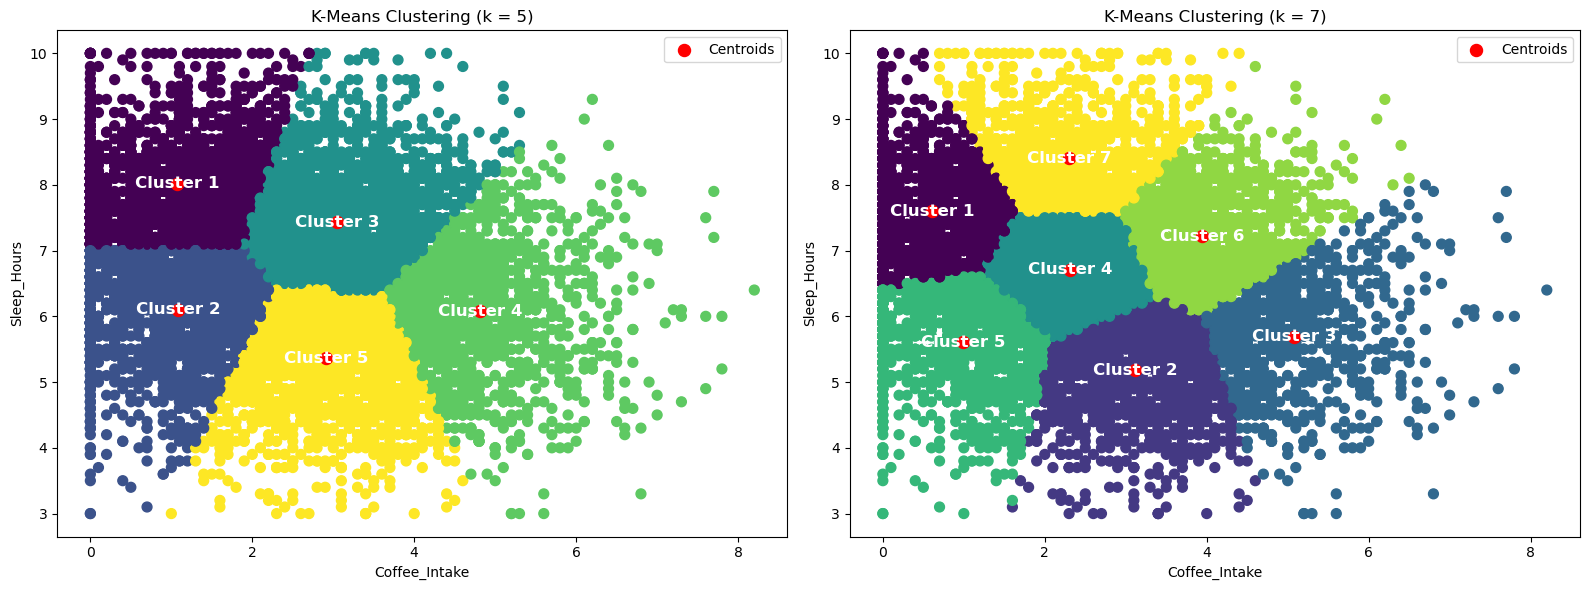

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# k = 5
kmeans_5 = KMeans(n_clusters=5, n_init=100, random_state=42)
clusters_5 = kmeans_5.fit_predict(X)
centers_5 = kmeans_5.cluster_centers_

axes[0].scatter(X[:, 0], X[:, 1],
                c=clusters_5, cmap="viridis", s=50)
axes[0].scatter(centers_5[:, 0], centers_5[:, 1],
                s=300, c='red', marker='.', label='Centroids')

for i, (x, y) in enumerate(centers_5):
    axes[0].text(x, y, f"Cluster {i+1}",
                 fontsize=12, color="white", weight="bold",
                 ha='center', va='center')

axes[0].set_xlabel("Coffee_Intake")
axes[0].set_ylabel("Sleep_Hours")
axes[0].set_title("K-Means Clustering (k = 5)")
axes[0].legend()

# k = 7
kmeans_7 = KMeans(n_clusters=7, n_init=100, random_state=42)
clusters_7 = kmeans_7.fit_predict(X)
centers_7 = kmeans_7.cluster_centers_

axes[1].scatter(X[:, 0], X[:, 1],
                c=clusters_7, cmap="viridis", s=50)
axes[1].scatter(centers_7[:, 0], centers_7[:, 1],
                s=300, c='red', marker='.', label='Centroids')

for i, (x, y) in enumerate(centers_7):
    axes[1].text(x, y, f"Cluster {i+1}",
                 fontsize=12, color="white", weight="bold",
                 ha='center', va='center')

axes[1].set_xlabel("Coffee_Intake")
axes[1].set_ylabel("Sleep_Hours")
axes[1].set_title("K-Means Clustering (k = 7)")
axes[1].legend()

plt.tight_layout()
plt.show()

We did not select k = 5 or k = 7 because both choices fail to achieve an appropriate balance between cluster interpretability and behavioral distinction.

When k = 5, the model combines distinct sleep–coffee behavior patterns into broader clusters, reducing interpretability and masking meaningful differences. As a result, important variations in caffeine consumption and sleep duration are obscured, reducing interpretability.

On the other hand, k = 7 leads to over-segmentation by splitting the data into smaller and partially overlapping clusters. Several clusters show limited separation and capture only marginal differences, suggesting potential overfitting and a focus on noise rather than true behavioral structure. This fragmentation further reduces interpretability and weakens the practical insights that can be drawn from the clustering results.

Therefore, the k = 6 solution best separates behavioral subgroups, improves within-cluster similarity, and provides clearer and more interpretable insights into caffeine and sleep patterns.

## 9. Influence of Coffee Intake to Stress Level

In [ ]:
# summary statistics of stress level on coffee intake
coffee.groupby("Stress_Level")["Coffee_Intake"].describe()

,count,mean,std,min,25%,50%,75%,max
Stress_Level,,,,,,,,
High,940.0,2.982128,1.485786,0.0,2.0,3.0,4.0,7.6
Low,6828.0,2.370328,1.416562,0.0,1.3,2.3,3.3,8.2
Medium,2006.0,2.762612,1.458646,0.0,1.7,2.8,3.8,7.8


#### Coffee Intake by Stress Level

The descriptive statistics show a clear pattern connecting stress level with coffee consumption. As stress increases, average coffee intake also increases, suggesting that individuals may rely more heavily on caffeine as their stress level rises.

Low Stress

Individuals reporting low stress have the lowest average coffee intake (mean = 2.37 cups/day). The quartiles (1.3 to 3.3 cups) indicate that most people in this group consume moderate amounts of coffee. This group also has the largest sample size, making it a stable baseline for comparison. The lower average suggests that individuals with low stress do not depend heavily on caffeine for energy or coping.

Medium Stress

The medium stress group shows a higher average intake (mean = 2.76 cups/day), along with a wider spread of values. The upper quartile reaches 3.8 cups, indicating that moderate-stress individuals are more likely to increase their caffeine consumption. This aligns with real-life behaviors, where moderate stress may reduce sleep quality or increase workload, leading to elevated caffeine use.

High Stress

Participants with high stress consume the most coffee on average (mean = 2.98 cups/day). The quartiles (2.0 to 4.0 cups) demonstrate consistently higher intake compared to the low-stress group. This suggests that caffeine is frequently used as a coping tool for fatigue, reduced focus, or emotional stress. The pattern reflects common behavioral responses in high-demand environments such as intensive academic settings, shift-based jobs, or high-pressure workplaces.


#### Regression Analysis on whether higher stress levels leads to higher coffee intake

In [ ]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

# convert stress level to ordered numeric variable
coffee["Stress_Ordinal"] = pd.Categorical(
    coffee["Stress_Level"],
    categories=["Low", "Medium", "High"],
    ordered=True
).codes  # Low = 0, Medium = 1, High = 2

# run OLS regression
model = smf.ols("Coffee_Intake ~ Stress_Ordinal", data=coffee).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Coffee_Intake   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     224.9
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           2.77e-50
Time:                        17:09:26   Log-Likelihood:                -17379.
No. Observations:                9774   AIC:                         3.476e+04
Df Residuals:                    9772   BIC:                         3.478e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.3782      0.017    140.

#### Regression Analysis Interpretation: Coffee Intake ~ Stress_Ordinal

The regression model evaluates whether stress level (treated as an ordered variable: Low = 0, Medium = 1, High = 2) predicts the amount of coffee consumed per day. The model is statistically significant, but the effect size is modest.

##### Model Fitness
- R-squared = 0.022*
  This means that stress level only explains 2.2% of the variation in coffee intake.

---

##### Coefficients
- Intercept = 2.3782
  This represents the predicted coffee intake for individuals with Low stress (the baseline category). On average, low-stress individuals consume about 2.38 cups/day.

- stress_Ordinal coefficient = 0.3306  
  This indicates that for each increase in stress level category, coffee intake increases by 0.33 cups/day on average.

  - Moving from Low → Medium stress: +0.33 cups  
  - Moving from Medium → High stress: +0.33 cups  
  - Moving from Low → High stress: ~ +0.66 cups  

  This supports the descriptive statistics showing higher coffee consumption among more stressed individuals.

---

##### Statistical Significance
- p-value < 0.001 for Stress_Ordinal  
  This confirms the relationship is statistically significant: stress level reliably predicts increases in coffee intake.

- F-statistic = 224.9, p < 0.0001
  The overall model is statistically significant.

The regression results support a positive trend:  
Individuals with higher stress levels consume more coffee. This aligns with behavioral expectations—people under stress often experience fatigue, reduced sleep quality, and increased cognitive demands, all of which may lead to higher caffeine consumption.

However, the small R-squared value indicates that stress is only one of many factors influencing coffee intake.


## 10. Overall Analysis on Coffee Intake

In [ ]:
# Random Forest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Define target variable
y = coffee["Coffee_Intake"]
# Define predictor variable (everything except ID and Caffeine_mg)
# Caffeine_mg is removed because it's mathematically derived from Coffee_Intake, which would cause leakage
X = coffee.drop(columns=["Coffee_Intake", "Caffeine_mg", "ID"])

categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Convert categorical variables (Country, Sleep_Quality, Occupation, etc.) into dummy variables
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(n_estimators=200, random_state=42)

from sklearn.pipeline import Pipeline
model = Pipeline(steps=[("preprocess", preprocess),
                       ("rf", rf)])

model.fit(X_train, y_train)

pred = model.predict(X_test)

mse = mean_squared_error(y_test, pred)
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))

MSE: 2.0780832714833757
RMSE: 1.441555850976082


The average prediction error is about 1.44 cups of coffee per day.
- Coffee consumption is naturally variable across individuals, so this level of error is reasonable.

In [ ]:
# identify which variables most strongly affect coffee intake
encoded_cols = list(model.named_steps["preprocess"]
                    .transformers_[0][1]
                    .get_feature_names_out(categorical_cols))

all_features = encoded_cols + list(numeric_cols)

importances = model.named_steps["rf"].feature_importances_

feature_importance = pd.DataFrame({
    "feature": all_features,
    "importance": importances
}).sort_values("importance", ascending=False)

print(feature_importance.head(20))

                    feature  importance
39                      BMI    0.152819
41  Physical_Activity_Hours    0.151781
38              Sleep_Hours    0.123382
40               Heart_Rate    0.122693
36                      Age    0.117892
37                   Gender    0.019337
43      Alcohol_Consumption    0.018189
42                  Smoking    0.015484
33         Occupation_Other    0.014620
31    Occupation_Healthcare    0.014491
35       Occupation_Student    0.014408
32        Occupation_Office    0.014094
34       Occupation_Service    0.013571
3            Country_Canada    0.011089
12      Country_Netherlands    0.010939
14      Country_South Korea    0.010035
6            Country_France    0.009874
7           Country_Germany    0.009672
4             Country_China    0.009655
5           Country_Finland    0.009643


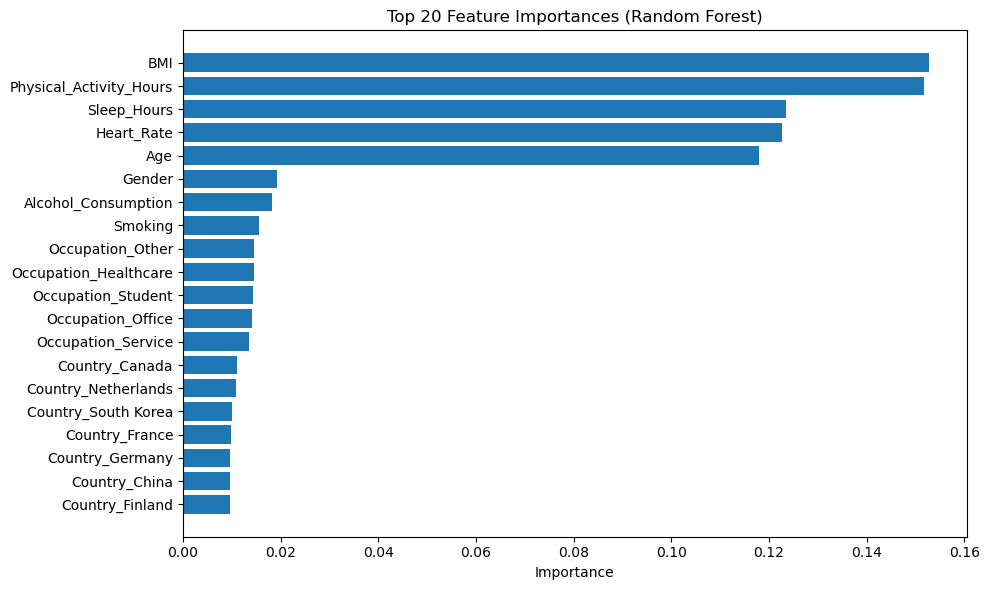

In [ ]:
# plot feature importance
imp_df = pd.DataFrame({"feature": all_features, "importance": importances})
imp_df = imp_df.sort_values("importance", ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(imp_df["feature"], imp_df["importance"])
plt.gca().invert_yaxis()  # The highest importance is on the top
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

### Random Forest Feature Importance

The Random Forest model identifies the variables that contribute most to predicting daily coffee intake. Higher importance scores reflect stronger influence. The results show that lifestyle and physiological variables play a far greater role than demographic factors such as country or gender.

##### 1. BMI (Importance = 0.1528)
BMI is the strongest predictor of coffee intake. Individuals with higher BMI tend to consume more coffee, possibly due to lifestyle patterns such as increased fatigue, stress, or lower sleep quality. BMI acts as a broad indicator of overall lifestyle and metabolic habits, which are closely linked to caffeine use.

##### 2. Physical Activity Hours (Importance = 0.1518)
Physical activity is nearly as influential as BMI. More active individuals may consume more coffee to support energy levels or enhance performance. This suggests that caffeine intake is integrated into active, high-energy lifestyles.

##### 3. Sleep Hours (Importance = 0.1234)
Sleep duration is a major determinant of coffee consumption. Individuals who sleep less typically consume more coffee to compensate for reduced alertness. This finding aligns with earlier descriptive statistics showing poor sleepers drink more caffeine.

##### 4. Heart Rate (Importance = 0.1227)
Heart rate is also a strong predictor. A higher resting heart rate may be associated with stress, anxiety, or stimulant use. Conversely, habitual coffee drinkers may exhibit elevated heart rate. This variable reflects the physiological side of caffeine consumption.

##### 5. Age (Importance = 0.1179)
Age shows meaningful influence on coffee intake. Consumption tends to increase with age, especially into middle adulthood, reflecting long-term habits or work-related demands.

##### 6. Gender (0.0193)
Gender has a small effect, suggesting minor differences between male and female coffee consumption patterns.

##### 7. Alcohol Consumption (0.0182)
Alcohol consumption moderately predicts coffee intake, consistent with behavioral studies showing that caffeine and alcohol often co-occur as lifestyle habits.

##### 8. Smoking (0.0155)
Smoking is another moderate predictor, historically linked to higher caffeine intake due to social and behavioral pairing.

##### 9.-13. Occupation Variables (0.0135–0.0146)
Occupation categories such as Office, Student, Healthcare, and Service show moderate influence on coffee consumption. This suggests that work schedule, stress levels, and productivity demands contribute to caffeine habits.

##### 14.-20. Country Variables (0.009–0.011)
Country-level effects show the lowest importance values. Although cultural differences exist, nationality plays only a small role compared to personal lifestyle variables.



### Decision Tree

In [ ]:
# create pipeline
from sklearn.tree import DecisionTreeRegressor
dt_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("tree", DecisionTreeRegressor(max_depth=5, random_state=42))
])

# train the model
dt_pipeline.fit(X_train, y_train)

pred_tree = dt_pipeline.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, pred_tree))

Decision Tree MSE: 2.028848686892514


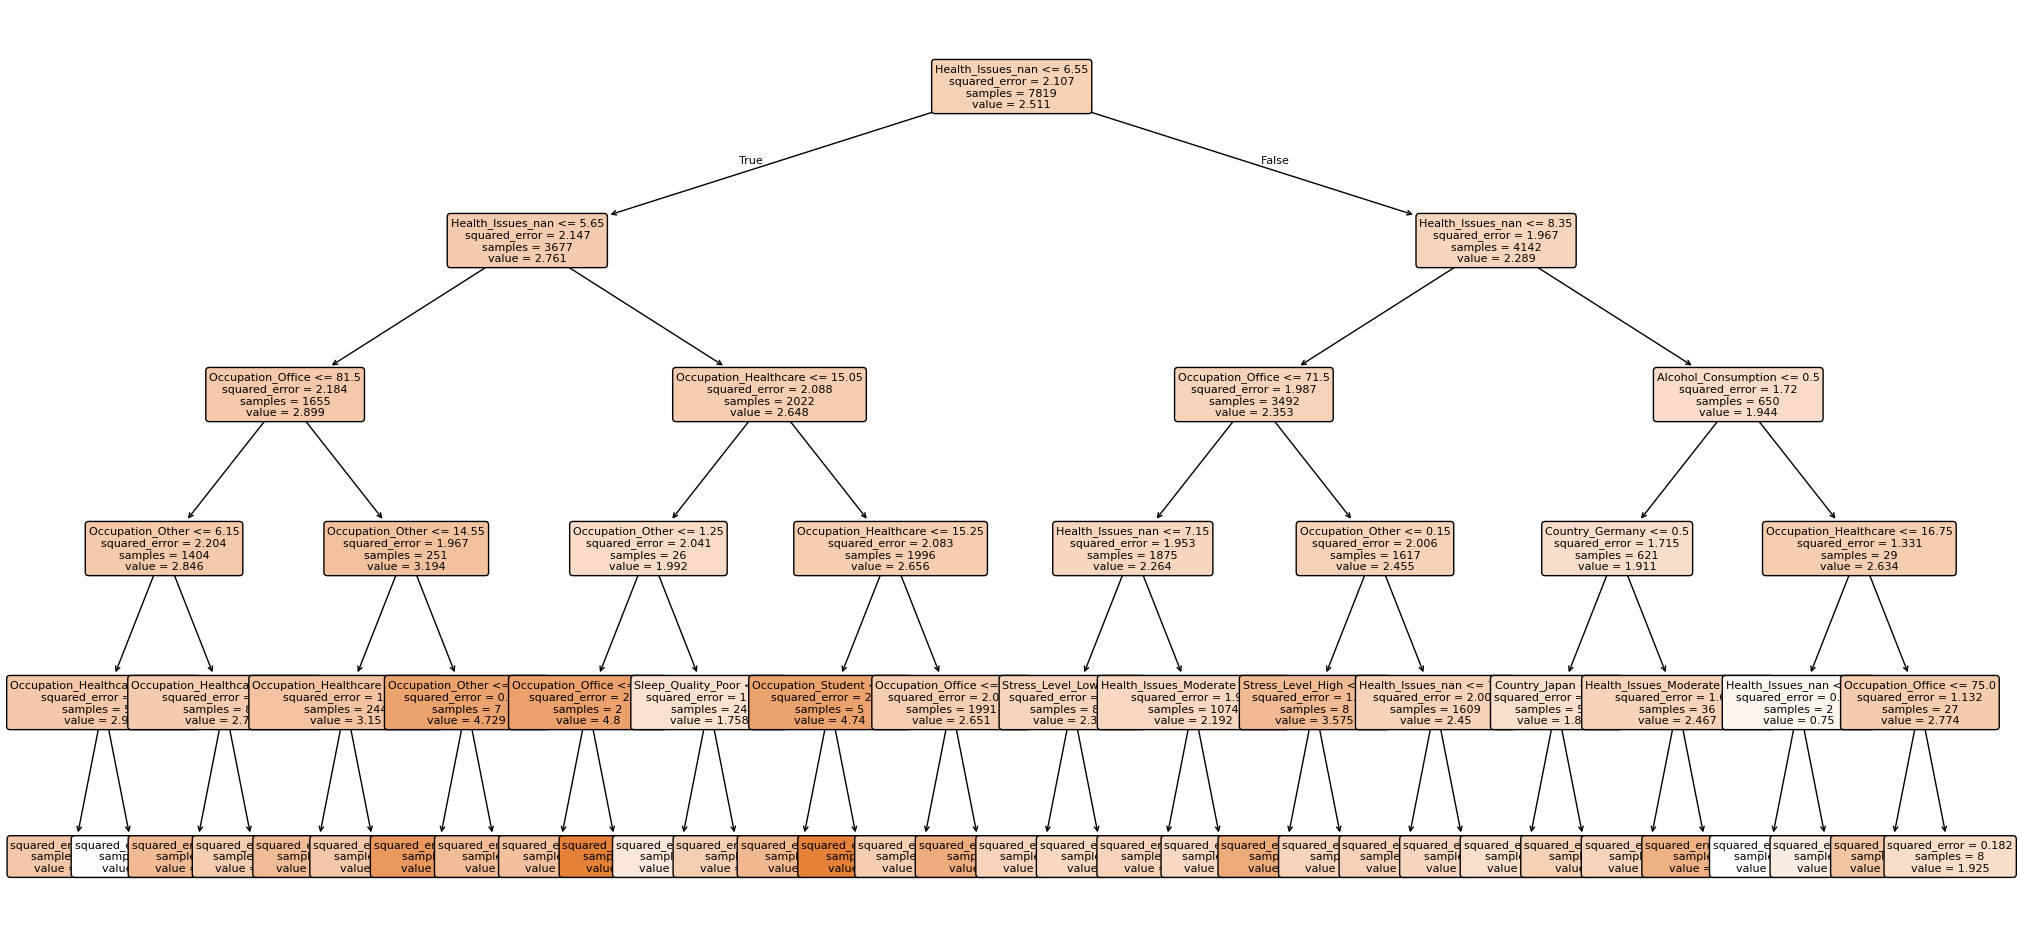

In [ ]:
# import libraries
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_model = dt_pipeline.named_steps["tree"]

# get encoded categorical variables
for name, trans, cols in dt_pipeline.named_steps["preprocess"].transformers_:
    if name == "cat":
        encoder = trans
        encoded_cols = list(encoder.get_feature_names_out(cols))
        break

# combine numeric and encoded categorical variables
numeric_cols_final = list(numeric_cols)
all_features = numeric_cols_final + encoded_cols

# plot the decision tree
plt.figure(figsize=(25, 12))
plot_tree(
    tree_model,
    feature_names=all_features,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()

#### Decision Tree Model Analysis

The decision tree was trained to predict Coffee Intake using all lifestyle, demographic, and health-related features.  
With a test MSE of 2.03, the tree performs similarly to the Random Forest but provides the advantage of interpretability.  
The visualization reveals how the model splits the population into subgroups based on the strongest predictors of coffee consumption.

---
##### Top-Level Split: Health Issues  
The first split in the tree is based on Health_Issues, meaning this variable is the most important feature for dividing individuals into different patterns of coffee intake.

- Individuals with lower or no health issues (left branch) generally show higher average coffee consumption.
- Individuals with higher health issues (right branch) show lower coffee consumption.

This may reflect that people with chronic or severe conditions reduce caffeine due to medical advice.

---
##### Secondary Splits: Occupation and Lifestyle Factors
After splitting by health issues, the next major predictors are:

##### a. Occupation (Office vs. Non-Office)
Office workers consistently appear in branches with higher predicted coffee intake, likely due to:
- workplace coffee culture  
- high mental workload  
- long working hours  

Non-office roles (service, healthcare, other) show more variability.

##### b. Physical Activity and Sleep
Some branches split based on:
- Physical Activity Hours
- Sleep Quality  
- Sleep Hours

This pattern reflects:
- Individuals with poor sleep often drink more coffee.
- Individuals with higher physical activity may also increase caffeine intake for energy or performance.

---

##### 3. Additional Predictors: Stress, Alcohol Use, and Country
Deeper branches incorporate smaller but meaningful effects:
- High stress levels
    - Higher predicted coffee consumption  
- Alcohol Consumption
    - Slight increase in caffeine intake  
- Country differences
    - cultural difference

#### Model Interpretation
This model suggests that coffee intake is not random, it clusters around lifestyle profiles:

- Office workers drink more coffee because of workplace culture, busy schedules, and cognitive demands.
- Poor sleepers rely on caffeine for alertness.
- People with health restrictions tend to limit caffeine.

Thus, coffee consumption is a behavioral signal closely tied to energy needs, workload, and personal health conditions.